# Test Estadísticos

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

In [2]:
df = pd.read_pickle('../archivos/coste_vida_limpio.pkl')

In [3]:
df.head()

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,South Korea,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,China,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87
2,China,4.98,3.54,1.91,1.03,1.71,3.77,11.75,1.44,0.51,11.39,0.95,3.70,0.36,0.37,1.19,59.65,16.66,34.17,8.54,555.18,24556.21,688.05,1211.68
3,India,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.67,0.35,9.83,2.27,4.30,0.25,0.31,1.35,43.57,9.33,25.37,4.30,107.07,3682.67,699.80,640.81
4,India,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.75,0.36,9.83,1.54,4.30,0.49,0.22,1.24,58.07,7.95,21.20,4.91,74.00,1964.24,329.15,586.46


1- ¿Qué diferencia existe el error de tipo I y el error de tipo II?

- En el error de tipo I rechazamos la hipótesis nula, siendo verdadera
- En el error de tipo II aceptamos la hipótesis nula, siendo falsa

2- ¿Qué es la asimetría?

La asimetría es la distribución irregular de la muestra alrededor de la media, cuya curva puede estar sesgada hacia la derecha o hacia la izquierda. 

3- ¿Es vuestra variable respuesta asimétrica?

<Axes: xlabel='basic', ylabel='Count'>

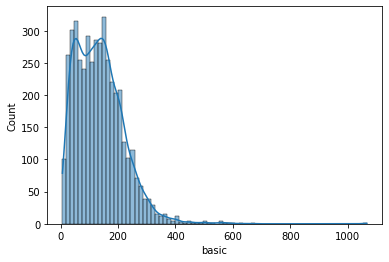

In [4]:
sns.histplot(x= 'basic', data = df, kde=True)

In [5]:
skew(df['basic'])

1.516601017558827

Nuestra variable es asimétrica, encontrandose sesgada hacia la derecha.

4- ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [6]:
kurtosistest(df['basic'])

KurtosistestResult(statistic=26.33085330582795, pvalue=8.50480590122542e-153)

Nuestra concentración de datos no se encuentra en el centro. No tiene sentido calcular la kurtosis porque nuestra variable no sigue una distribución normal.

5- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

<Axes: xlabel='basic', ylabel='Count'>

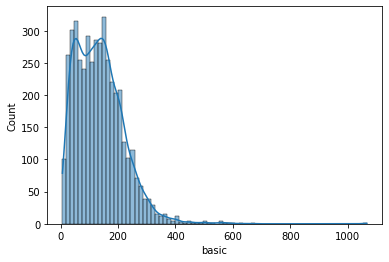

In [7]:
sns.histplot(df['basic'], kde=True)

In [12]:
df.shape

(4468, 24)

In [8]:
stats.shapiro(df['basic'])

ShapiroResult(statistic=0.9166607856750488, pvalue=2.802596928649634e-44)

- Nuestra variable dependiente NO sigue una distribución normal. Lo podemos comprobar tanto gráficamente como empleado el test de Saphiro, teniendo un pvalue < de 0.05.

Probamos a ver si alguna de nuestras otras variables cuenta con una distribución normal

In [13]:
numericas = df.select_dtypes(include = np.number)

In [14]:
fun.normalidad(numericas)

['mcdonalds, NO tiene distribución normal -> 1.5466991274404895e-31',
 'cappuccino, NO tiene distribución normal -> 5.151463403354317e-31',
 'milk, NO tiene distribución normal -> 0.0',
 'rice, NO tiene distribución normal -> 0.0',
 'eggs, NO tiene distribución normal -> 6.536721024443834e-40',
 'chicken, NO tiene distribución normal -> 0.0',
 'beef, NO tiene distribución normal -> 0.0',
 'banana, NO tiene distribución normal -> 0.0',
 'water, NO tiene distribución normal -> 0.0',
 'wine, NO tiene distribución normal -> 2.4067301124778733e-41',
 'beer, NO tiene distribución normal -> 3.5494890101347616e-42',
 'cigarettes_marlboro, NO tiene distribución normal -> 0.0',
 'public_transport_ticket, NO tiene distribución normal -> 0.0',
 'taxi, NO tiene distribución normal -> 1.6075695982734301e-41',
 'gasoline, NO tiene distribución normal -> 6.825145665881672e-26',
 'basic, NO tiene distribución normal -> 2.802596928649634e-44',
 'internet, NO tiene distribución normal -> 0.0',
 'gym_mont

Comprobamos que ninguna de nuestras variables numércias sigue una distribución normal.